In [1]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy import stats
from fitter import Fitter
import random

In [2]:
df = pd.read_csv('engine_system.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df.head(10)      #reshaped and restructured data with only engine readings (ffill method)

,61443-91,61444-512,61444-513
0,58.8,43.0,45.0
1,0.0,0.0,0.0
2,39.2,39.0,37.0
3,47.6,0.0,38.0
4,53.6,15.0,15.0
5,0.0,0.0,3.0
6,66.0,38.0,37.0
7,65.2,7.0,6.0
8,52.4,44.0,37.0
9,66.8,0.0,0.0


In [4]:
def moving_avg(x, N=1000):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

In [5]:
df.describe()

,61443-91,61444-512,61444-513
count,126729.000000,126729.000000,126729.000000
mean,26.590432,21.989182,19.757104
std,31.387741,25.932387,22.410236
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,7.000000,6.000000
75%,54.800000,43.000000,36.000000
max,100.000000,99.000000,95.000000


Checking Data Distribution for Synthetic Data generation

In [6]:
'''f = Fitter(df.loc[df['61443-91'] != 0.0, '61443-91'], timeout=120)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary(method='aic')'''

"f = Fitter(df.loc[df['61443-91'] != 0.0, '61443-91'], timeout=120)\nf.fit()\n# may take some time since by default, all distributions are tried\n# but you call manually provide a smaller set of distributions\nf.summary(method='aic')"

In [7]:
#f.summary(method='aic')

In [8]:
#f.summary(method='ks_statistic')

In [9]:
#f.summary(method='bic')

In [10]:
'''print("Metric=AIC: " + str(f.get_best(method='aic')))
print("Metric=KS statistic: " + str(f.get_best(method='ks_statistic')))
print("Metric=sse: " + str(f.get_best(method='sumsquare_error')))'''

'print("Metric=AIC: " + str(f.get_best(method=\'aic\')))\nprint("Metric=KS statistic: " + str(f.get_best(method=\'ks_statistic\')))\nprint("Metric=sse: " + str(f.get_best(method=\'sumsquare_error\')))'

In [11]:
'''from scipy.stats import genlogistic, uniform, weibull_min 
samples = genlogistic.rvs(0.7224547319484056, loc=60.60991437363757, scale=11.733752133625206, size=len(df['61443-91']))
samples1 = uniform.rvs(loc=0.0, scale=100.0, size=len(df['61443-91']))
samples2 = weibull_min.rvs(4.57668272551534, loc=-38.33756332153678, scale=100.7829601584528, size=len(df['61443-91']))'''

"from scipy.stats import genlogistic, uniform, weibull_min \nsamples = genlogistic.rvs(0.7224547319484056, loc=60.60991437363757, scale=11.733752133625206, size=len(df['61443-91']))\nsamples1 = uniform.rvs(loc=0.0, scale=100.0, size=len(df['61443-91']))\nsamples2 = weibull_min.rvs(4.57668272551534, loc=-38.33756332153678, scale=100.7829601584528, size=len(df['61443-91']))"

In [12]:
#f.plot_pdf(['genlogistic', 'uniform', 'weibull_min'])

In [13]:
distributions = [
    stats.norm,     # Normal distribution
    stats.expon,
    stats.weibull_min,
    stats.burr12,
    stats.cauchy
]

# Fit data to each distribution and calculate the AIC for comparison
best_distribution = None
best_params = {}
best_aic = np.inf

for distribution in distributions:
    # Fit the data to the distribution
    params = distribution.fit(df['61443-91'])
    
    # Calculate the AIC (Akaike Information Criterion)
    _, aic = stats.kstest(df['61443-91'], distribution.cdf, args=params)
    
    # Update the best distribution if the current one has a lower AIC
    if aic < best_aic:
        best_distribution = distribution
        best_params = params
        best_aic = aic

print("Best fitting distribution:", best_distribution.name)
print("Parameters:", best_params)

C:\Users\virag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scipy\stats\_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu


Best fitting distribution: norm
Parameters: (26.590431550789482, 31.38761713020512)


Comparing samples from the top chosen distributions to the original data

In [14]:
'''samples = pd.Series(samples)
samples1 = pd.Series(samples1)
samples2 = pd.Series(samples2)'''

'samples = pd.Series(samples)\nsamples1 = pd.Series(samples1)\nsamples2 = pd.Series(samples2)'

In [15]:
'''w=500   #comparison with genlogistic
plt.figure(figsize=(15,5))
v1 = samples.rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w
v2 = df['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w
plt.title('Accelerator Pedal Position (%) ')
plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
plt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')
plt.legend()'''

"w=500   #comparison with genlogistic\nplt.figure(figsize=(15,5))\nv1 = samples.rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w\nv2 = df['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w\nplt.title('Accelerator Pedal Position (%) ')\nplt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')\nplt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')\nplt.legend()"

In [16]:
'''w=500   #comparison with uniform
plt.figure(figsize=(15,5))
v1 = samples1.rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w
v2 = df['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w
plt.title('Accelerator Pedal Position (%) ')
plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
plt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')
plt.legend()'''

"w=500   #comparison with uniform\nplt.figure(figsize=(15,5))\nv1 = samples1.rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w\nv2 = df['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w\nplt.title('Accelerator Pedal Position (%) ')\nplt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')\nplt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')\nplt.legend()"

In [17]:
'''w=500       #comparison with weibull_min
plt.figure(figsize=(15,5))
v1 = samples2.rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w
v2 = df['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w
plt.title('Accelerator Pedal Position (%) ')
plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
plt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')
plt.legend()'''

"w=500       #comparison with weibull_min\nplt.figure(figsize=(15,5))\nv1 = samples2.rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w\nv2 = df['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w\nplt.title('Accelerator Pedal Position (%) ')\nplt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')\nplt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')\nplt.legend()"

In [18]:
df['61443-91'].value_counts()[0.0]  #appx 50% of the values are 0

63886

Stops have roughly 3000 consecutive values of 0. Running time has 11000 consecutive values

In [19]:
'''
counter = 0                             #checking consecutive values of 0
for i in range(len(df)):
    try:
        next = df.iloc[i+1][0]
    except:
        print("")
    if(df.iloc[i][0] == 0):
        counter += 1
    if(df.iloc[i][0] == 0 and next != 0):
        print(counter)
        counter = 0
print(counter)
'''

'\ncounter = 0                             #checking consecutive values of 0\nfor i in range(len(df)):\n    try:\n        next = df.iloc[i+1][0]\n    except:\n        print("")\n    if(df.iloc[i][0] == 0):\n        counter += 1\n    if(df.iloc[i][0] == 0 and next != 0):\n        print(counter)\n        counter = 0\nprint(counter)\n'

In [20]:
dsets = []                                                          #Initializing variables and distribution parameters
from scipy.stats import expon, norm
rate = 0.4  # rate parameter (λ) for the exponential distribution
loc = 53.22218226373661  # location parameter (optional)
mean = 53.62218226373661
std = 23.177889163123186

# Create an exponential distribution object with specified parameters
exponential_dist = expon(scale=1/rate, loc=loc)
normal_dist = norm(scale = std, loc = mean)
for k in range(40):
    sample_df = pd.DataFrame(0.0, index = np.arange(len(df)), columns=['61443-91','61444-512', '61444-513'])
    curr_index = 0
    for index in range(len(sample_df)):
        if(curr_index < index and random.random() < 0.0005):
            if (index - curr_index) < 2700:
                for x in range(curr_index, index):
                    sample_df.iloc[x][1] = random.randint(0,6)
                    sample_df.iloc[x][2] = sample_df.iloc[x][1]
            length = random.randint(4000, 9000)
            curr_index = index + length
            counter = 0
            for i in range(length):
                if(random.random() >= 0.05):
                    var = exponential_dist.rvs().round(1)
                    try:
                        sample_df.iloc[index+i][0] = min(100, max(0, var))
                    except:
                        pass
                    try:
                        if(random.random() > 0.005):
                            if(random.random() > 0.0005):
                                sample_df.iloc[index+i][0] = min(100, (sample_df.iloc[index+i-1][0] + random.randint(5, 25)/10))           #upward trend
                            else:
                                sample_df.iloc[index+i][0] = max(0, (sample_df.iloc[index+i-1][0] - random.randint(50, 80)/10))           #downward trend
                    except:
                        pass
                try:
                    if(random.random() <= 0.01):
                        sample_df.iloc[index+i][1] = min(100, max(0, exponential_dist.rvs().round(1)))
                    else:
                        if min(0, (sample_df.iloc[index+i][0] - (random.randint(4,28)/10))) == 0:
                            sample_df.iloc[index+i][1] = sample_df.iloc[index+i][0]
                        else:
                            sample_df.iloc[index+i][1] = sample_df.iloc[index+i][0] - (random.randint(5,60)/10)
                    if(random.random() <= 0.02):
                        sample_df.iloc[index+i][2] = min(100, max(0, exponential_dist.rvs().round(1)))
                    else:
                        if min(0, (sample_df.iloc[index+i][0] - (random.randint(8,56)/10))) == 0:
                            sample_df.iloc[index+i][2] = sample_df.iloc[index+i][0]
                        else:
                            sample_df.iloc[index+i][2] = sample_df.iloc[index+i][0] - (random.randint(8,100)/10)
                except:
                    pass
    dsets.append(sample_df)

In [21]:
sample_df['61443-91'].value_counts()[0.0]  #appx 50% of the values are 0

32911

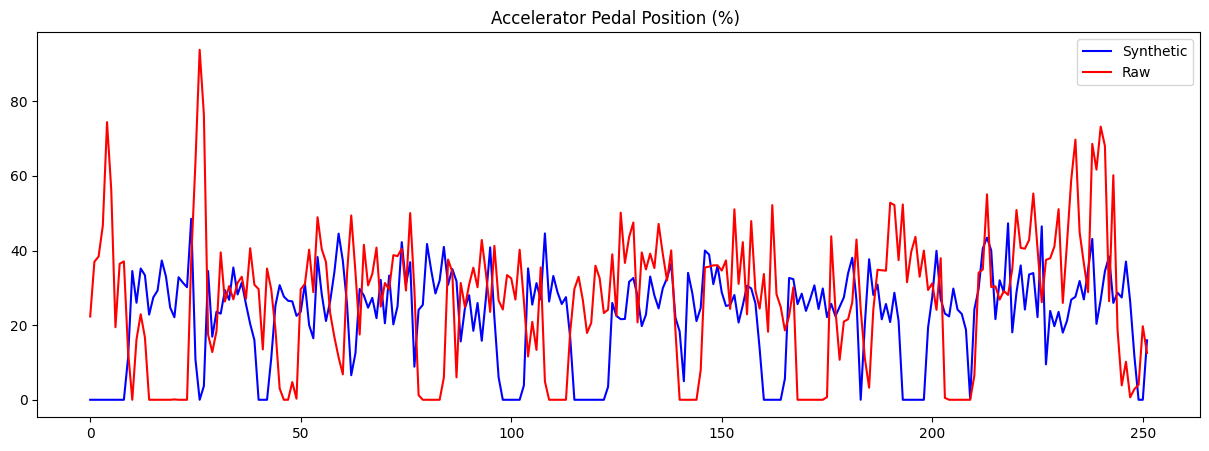

In [22]:
w=500
plt.figure(figsize=(15,5))
v1 = sample_df['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w
v2 = df['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w
plt.title('Accelerator Pedal Position (%) ')
plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
plt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')
plt.legend()

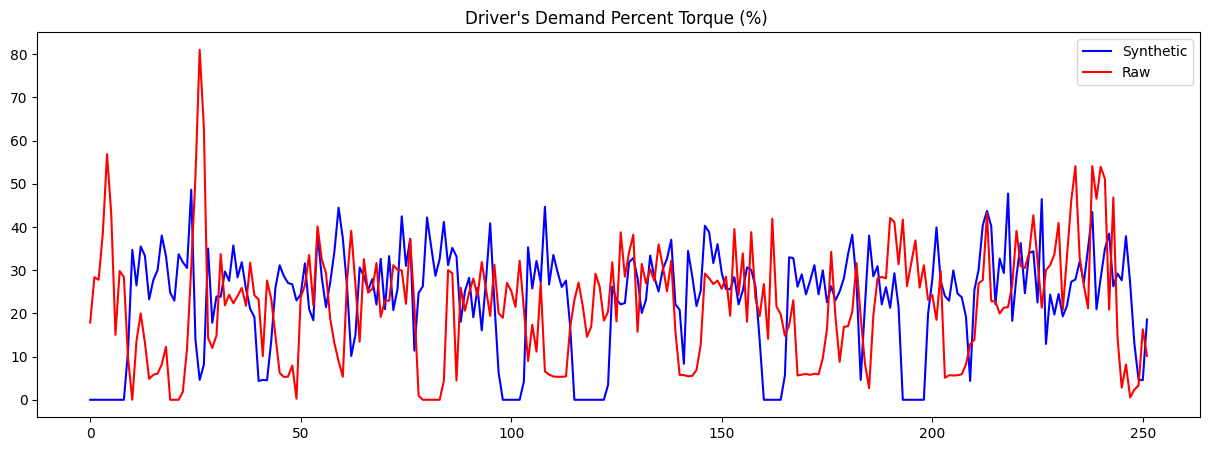

In [23]:
w=500
plt.figure(figsize=(15,5))
v1 = sample_df['61444-512'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w
v2 = df['61444-512'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w
plt.title('Driver\'s Demand Percent Torque (%) ')
plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
plt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')
plt.legend()

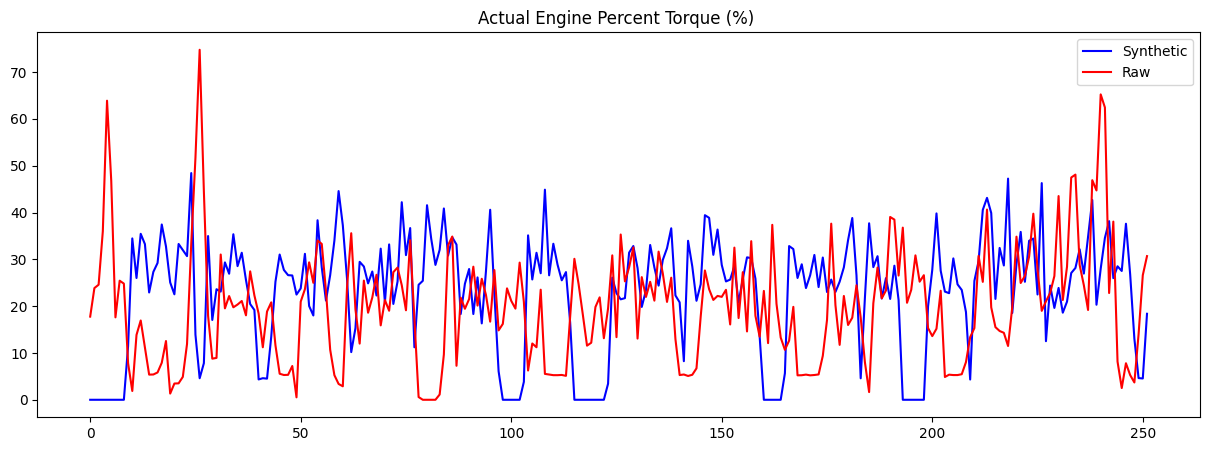

In [24]:
w=500
plt.figure(figsize=(15,5))
v1 = sample_df['61444-513'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w
v2 = df['61444-513'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w
plt.title('Actual Engine Percent Torque (%) ')
plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
plt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')
plt.legend()

In [25]:
sample_df.describe()

,61443-91,61444-512,61444-513
count,126729.000000,126729.000000,126729.000000
mean,22.632453,23.254068,23.038653
std,27.171850,27.118961,27.309625
min,0.000000,-2.800000,-5.600000
25%,0.000000,2.300000,1.000000
50%,12.000000,12.300000,12.300000
75%,34.100000,35.700000,35.700000
max,100.000000,100.000000,100.000000


In [26]:
df.describe()

,61443-91,61444-512,61444-513
count,126729.000000,126729.000000,126729.000000
mean,26.590432,21.989182,19.757104
std,31.387741,25.932387,22.410236
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,7.000000,6.000000
75%,54.800000,43.000000,36.000000
max,100.000000,99.000000,95.000000


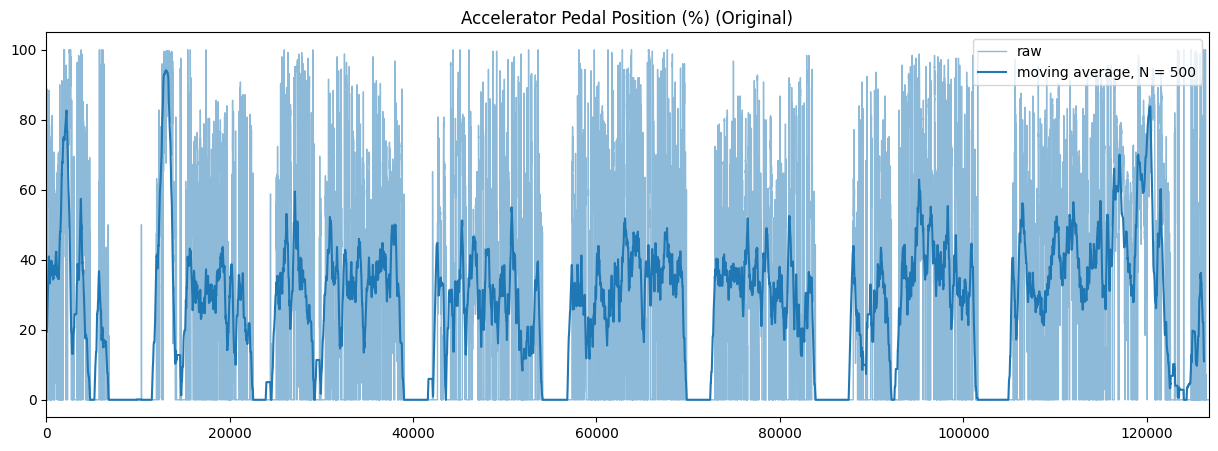

In [27]:
vals = df['61443-91']
avg = moving_avg(vals, 500)
plt.figure(figsize=(15,5))
plt.plot(vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(avg, 'C0', label = 'moving average, N = 500')
plt.xlim(0,len(df['61443-91']))
plt.legend()
plt.title('Accelerator Pedal Position (%) (Original)')
plt.show()

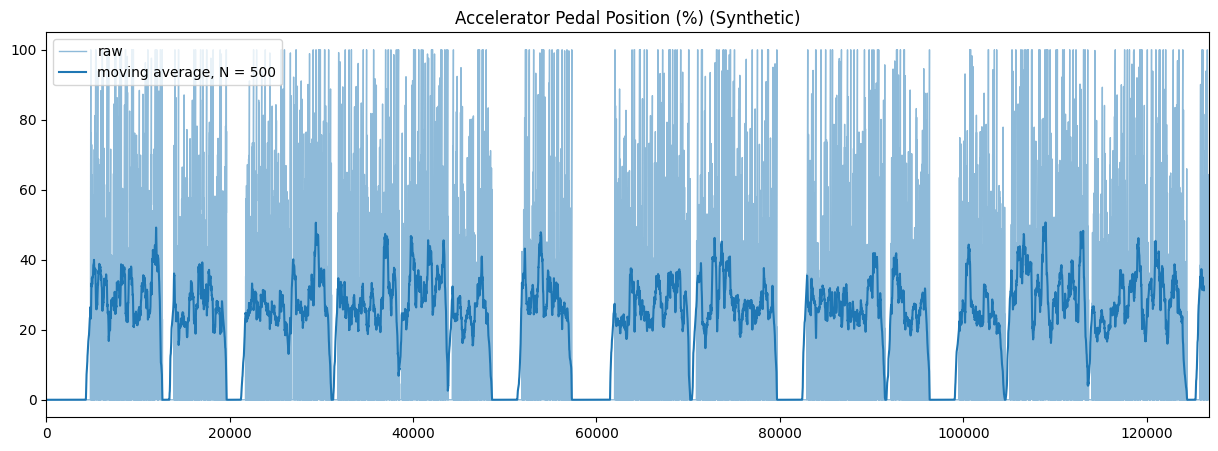

In [28]:
vals = sample_df['61443-91']
avg = moving_avg(vals, 500)
plt.figure(figsize=(15,5))
plt.plot(vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(avg, 'C0', label = 'moving average, N = 500')
plt.xlim(0,len(sample_df['61443-91']))
plt.legend()
plt.title('Accelerator Pedal Position (%) (Synthetic)')
plt.show()

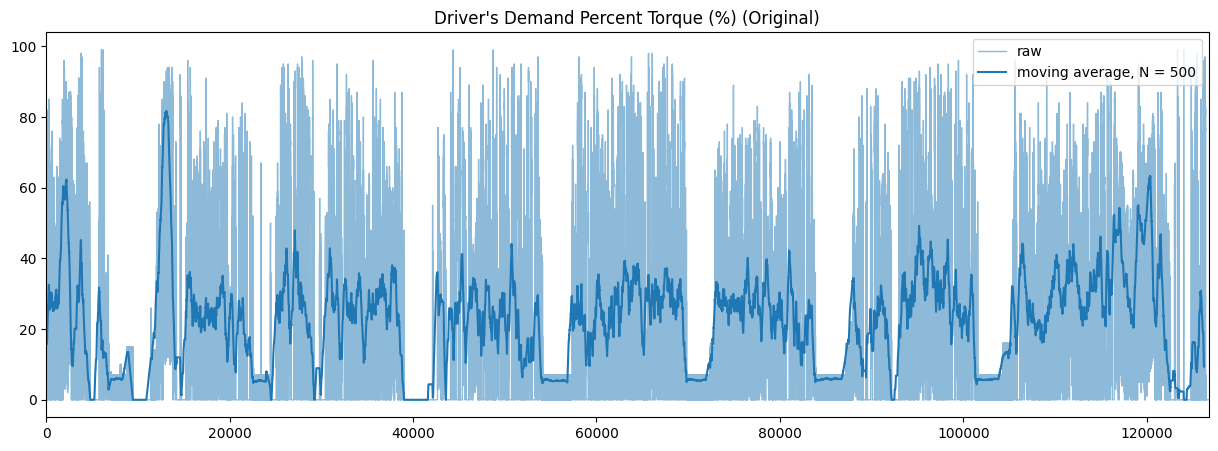

In [29]:
vals = df['61444-512']
avg = moving_avg(vals, 500)
plt.figure(figsize=(15,5))
plt.plot(vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(avg, 'C0', label = 'moving average, N = 500')
plt.xlim(0,len(df['61443-91']))
plt.legend()
plt.title('Driver\'s Demand Percent Torque (%) (Original)')
plt.show()

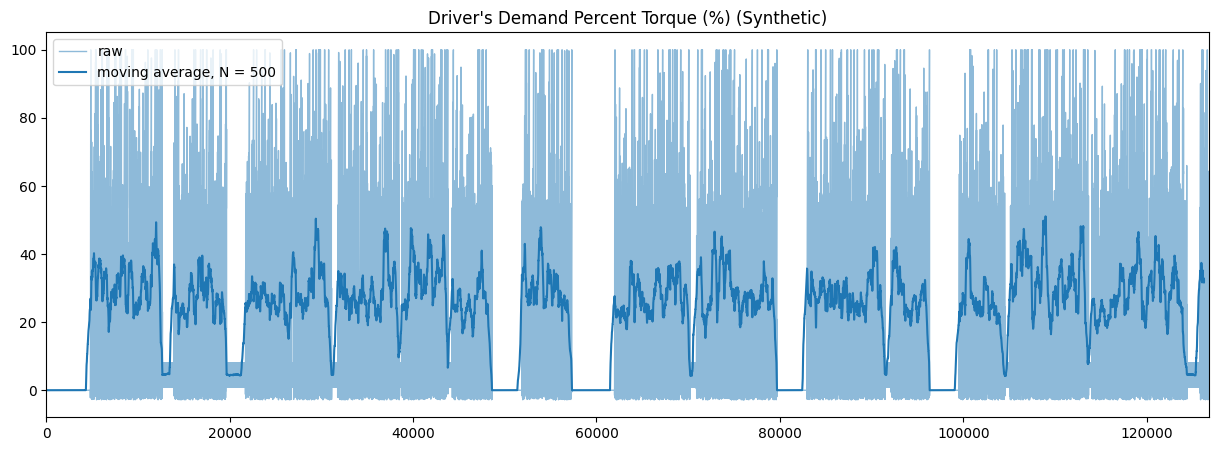

In [30]:
vals = sample_df['61444-512']
avg = moving_avg(vals, 500)
plt.figure(figsize=(15,5))
plt.plot(vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(avg, 'C0', label = 'moving average, N = 500')
plt.xlim(0,len(sample_df['61443-91']))
plt.legend()
plt.title('Driver\'s Demand Percent Torque (%) (Synthetic)')
plt.show()

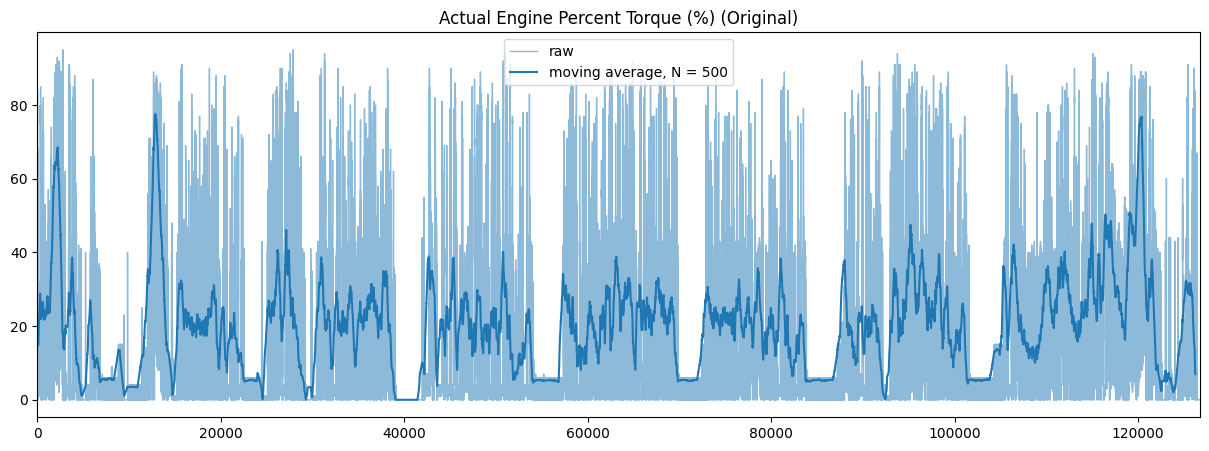

In [31]:
vals = df['61444-513']
avg = moving_avg(vals, 500)
plt.figure(figsize=(15,5))
plt.plot(vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(avg, 'C0', label = 'moving average, N = 500')
plt.xlim(0,len(df['61443-91']))
plt.legend()
plt.title('Actual Engine Percent Torque (%) (Original)')
plt.show()

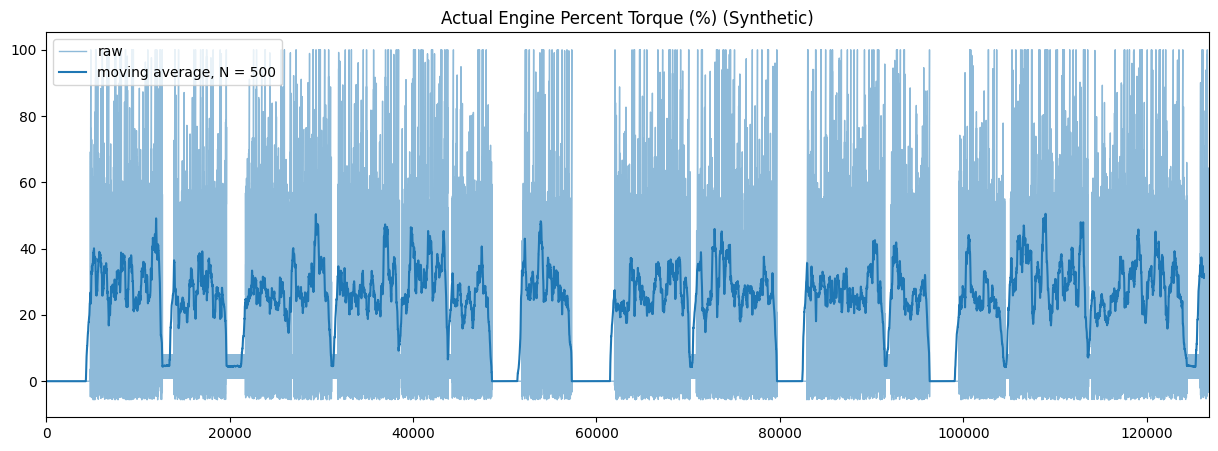

In [32]:
vals = sample_df['61444-513']
avg = moving_avg(vals, 500)
plt.figure(figsize=(15,5))
plt.plot(vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(avg, 'C0', label = 'moving average, N = 500')
plt.xlim(0,len(sample_df['61443-91']))
plt.legend()
plt.title('Actual Engine Percent Torque (%) (Synthetic)')
plt.show()

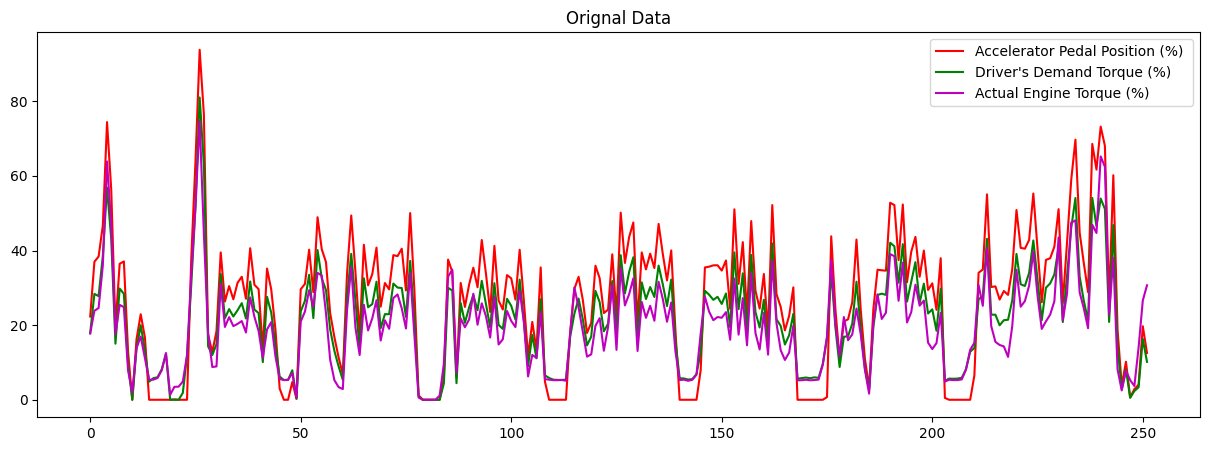

In [33]:
w=500
plt.figure(figsize=(15,5))
v2 = df['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w
v3 = df['61444-512'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w
v4 = df['61444-513'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w
plt.title('Orignal Data')
plt.plot(np.arange(len(v2)),v2, c='r', label='Accelerator Pedal Position (%) ')
plt.plot(np.arange(len(v2)),v3, c='g', label='Driver\'s Demand Torque (%) ')
plt.plot(np.arange(len(v2)),v4, c='m', label='Actual Engine Torque (%) ')
plt.legend()

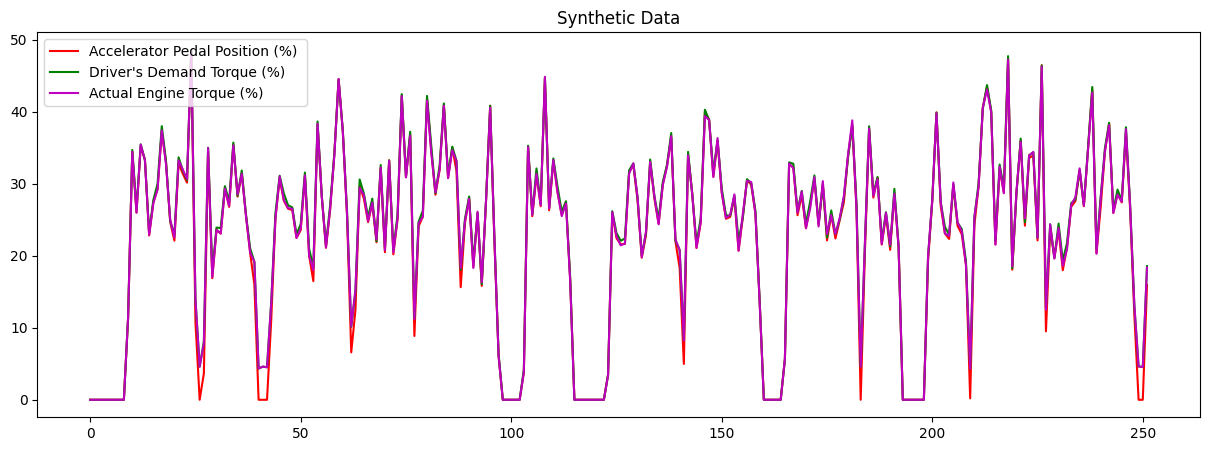

In [34]:
w=500
plt.figure(figsize=(15,5))
v2 = sample_df['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(sample_df)/w))]]/w
v3 = sample_df['61444-512'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(sample_df)/w))]]/w
v4 = sample_df['61444-513'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(sample_df)/w))]]/w
plt.title('Synthetic Data')
plt.y(0, 90)
plt.plot(np.arange(len(v2)),v2, c='r', label='Accelerator Pedal Position (%) ')
plt.plot(np.arange(len(v2)),v3, c='g', label='Driver\'s Demand Torque (%) ')
plt.plot(np.arange(len(v2)),v4, c='m', label='Actual Engine Torque (%) ')
plt.legend()

In [35]:
'''path = r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\Final_engine_sys_data'
for i in range(len(dsets)):         #Creating a list of all the datasets
    dsets[i].to_csv(path+'\\final_engine_dset_'+str(i)+'.csv')'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 11-12: truncated \UXXXXXXXX escape (3173040284.py, line 1)